# DATA LOADING

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor    # For implementing a powerful, flexible tree-based model
from sklearn.metrics import mean_absolute_error       # For evaluating model accuracy

In [2]:
data=pd.read_csv("/Users/saikiranbarma/Desktop/Walmart DataSet.CSV")

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data .dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
#information fo the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Preprocessing

In [7]:

# Date column is in object type so converting 'date' column to a datetime type.
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [8]:

#feature engineering
#We create new columns (Year, Month, day) to capture seasonal patterns in the data
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [9]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [10]:
#handling missing values
# Count missing values
missing_values = data.isnull().sum()
print("Missing Values Count:")
print(missing_values)

Missing Values Count:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64


In [11]:
# Extract year, month, and day features
daily_sales['Year'] = daily_sales['Date'].dt.year
daily_sales['Month'] = daily_sales['Date'].dt.month
daily_sales['Day'] = daily_sales['Date'].dt.day

NameError: name 'daily_sales' is not defined

# Explotray Data Anlaysis

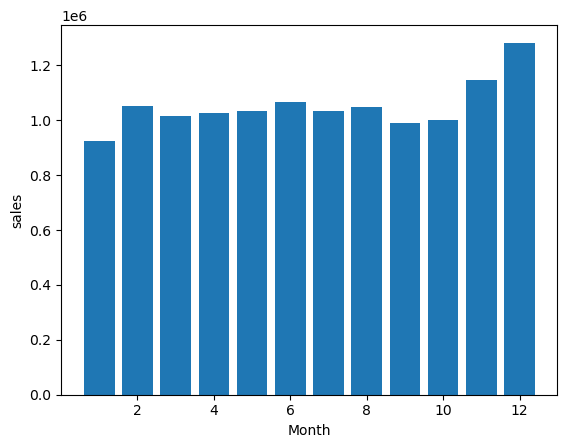

In [12]:
month_by_sales = data.groupby('Month')['Weekly_Sales'].mean()
plt.bar(month_by_sales.index, month_by_sales.values)
plt.xlabel('Month')
plt.ylabel('sales')
plt.show()

sales were same every month except 11 and 12 th month

In [13]:
# Group by Date and Store to aggregate daily sales
daily_sales = data.groupby(['Date', 'Store']).agg({
    'Weekly_Sales': 'sum',
    'Holiday_Flag': 'max',  # Assuming Holiday_Flag applies to the whole week
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [14]:
# Replace Inf and -Inf with NaN in the DataFrame
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, handle NaN values here, for example, by dropping rows with NaN values:
data.dropna(inplace=True)

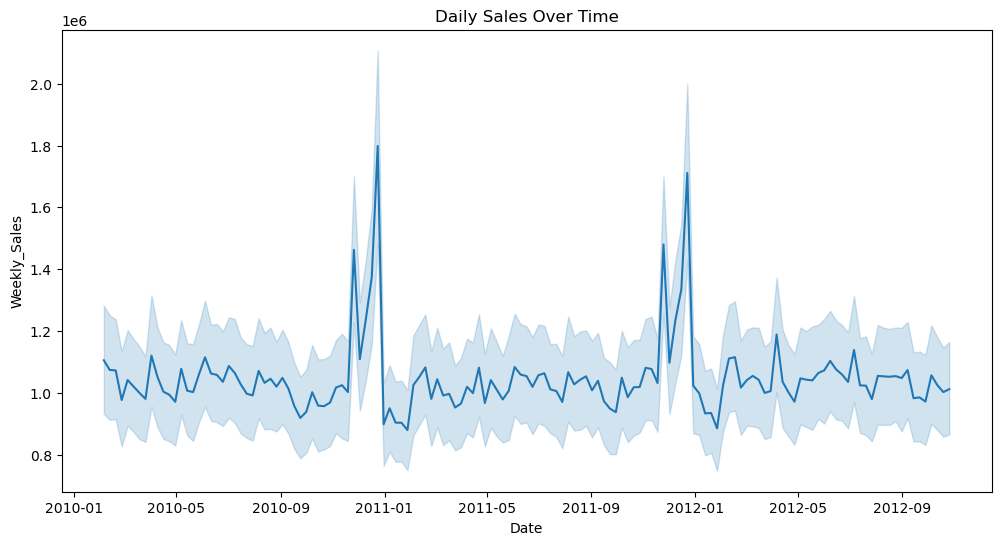

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na*")
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x="Date", y="Weekly_Sales")
plt.title("Daily Sales Over Time")
plt.show()

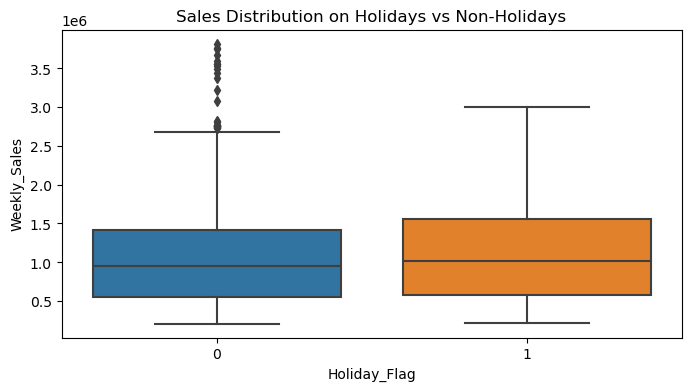

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=daily_sales, x="Holiday_Flag", y="Weekly_Sales")
plt.title("Sales Distribution on Holidays vs Non-Holidays")
plt.show()

# Splitting Data into Train and Test 

In [17]:
# To prevent data leakage, we split the data chronologically. We train on early data and test on the more recent data.
# Select features and target
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']
target = 'Weekly_Sales'

# Split the data by date for train-test
train_data = data[data['Date'] < '2012-01-01']
test_data = data[data['Date'] >= '2012-01-01']

# Extract feature and target variables
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Training a Machine Learning Model

In [18]:

# We are using a RandomForestRegressor for its ability to capture non-linear relationships in the data. Fit the model on the training set.
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluating the Model

In [19]:
#Predicting weekly sales for the test set and evaluate using metrics like Mean Absolute Error (MAE).
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 176392.52793012923


our typical sales are around the 75th percentile (1.42 million), then the MAE is roughly 12.4% of this typical value:
176,392/1,420,159≈0.124 or 12.4%


In [20]:
# Avoid SettingWithCopyWarning by making a copy and using .loc[]
X_test = X_test.copy()  # Ensures X_test is a separate copy
X_test.loc[:, 'Date'] = data.loc[X_test.index, 'Date']  # Adding 'Date' back for plotting


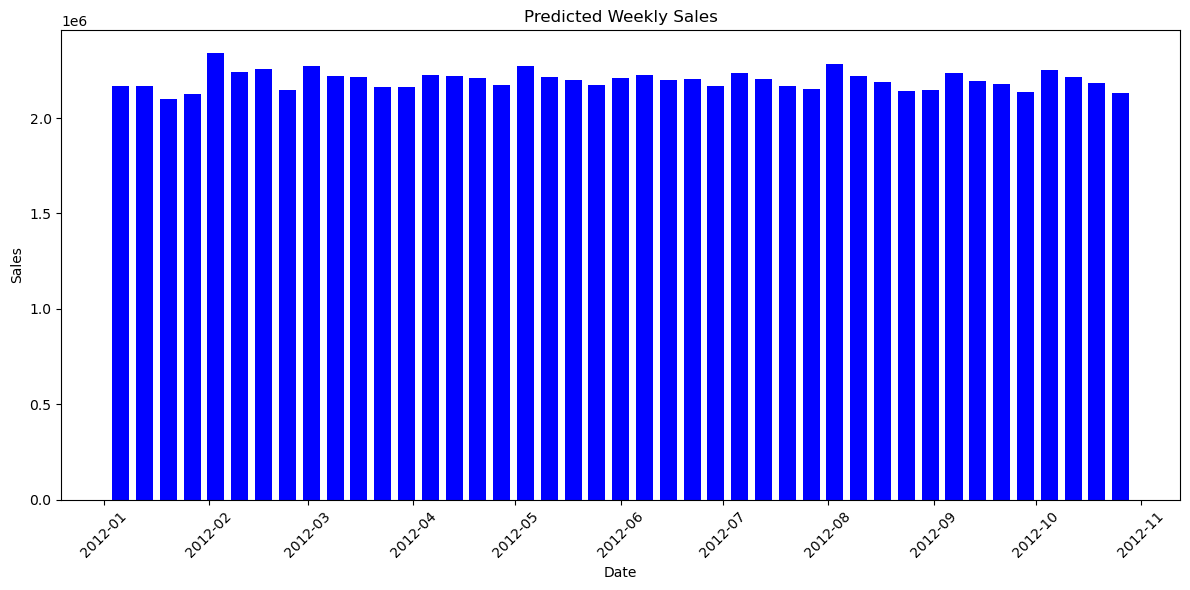

In [21]:
X_test['Date'] = data.loc[X_test.index, 'Date']  # Adjust indexing as necessary

# Ensure 'Date' is in datetime format
X_test['Date'] = pd.to_datetime(X_test['Date'])

# Plotting predicted sales using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(X_test['Date'], predictions, color='blue', width=5)  # You can adjust the width as needed
plt.title("Predicted Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Actual vs Predicted Sales

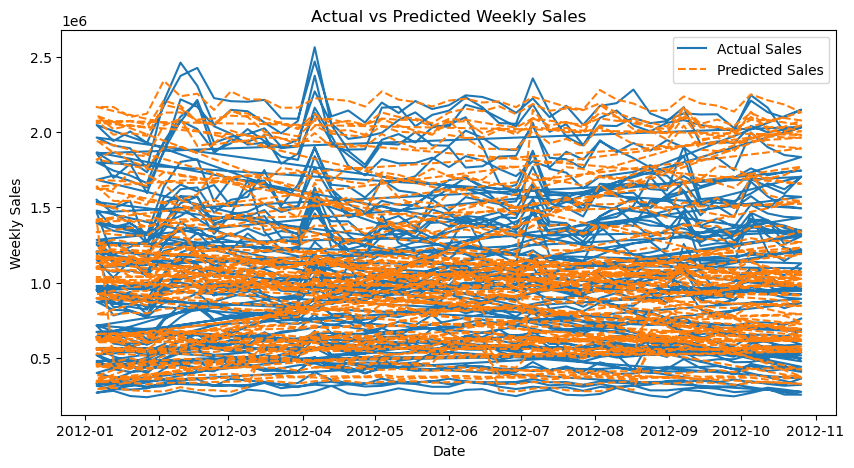

In [22]:
#Plot Actual vs Predicted Sales(line graph)
#Visualizing predictions against actual values helps identify patterns in errors or possible areas for model improvement.
# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(test_data['Date'], y_test, label="Actual Sales")
plt.plot(test_data['Date'], predictions, label="Predicted Sales", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

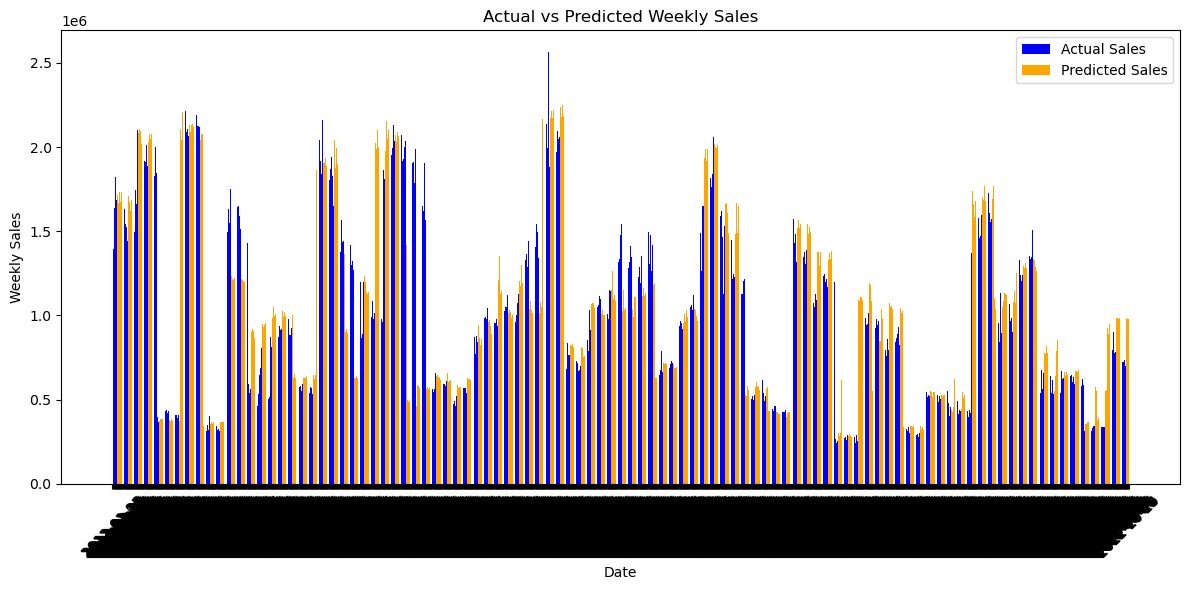

In [23]:
#Plot Actual vs Predicted Sales(bar graph)
# Ensure that the 'Date' column is in the correct format using .loc
test_data.loc[:, 'Date'] = pd.to_datetime(test_data['Date'])

# Create a bar plot for actual and predicted sales
plt.figure(figsize=(12, 6))

# Set bar width
bar_width = 0.4

# Create bar positions
x = range(len(test_data))

# Plot actual sales as bars
plt.bar(x, y_test, width=bar_width, label="Actual Sales", color='blue', align='center')

# Plot predicted sales as bars, offset by bar width
plt.bar([i + bar_width for i in x], predictions, width=bar_width, label="Predicted Sales", color='orange', align='edge')

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.xticks([i + bar_width / 2 for i in x], test_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45)  # Rotate date labels for clarity
plt.legend()
plt.tight_layout()
plt.show()